### Time Series with Pandas

In this chapter, we focus on time series data and use Pandas when working with time-stamped data.

Objectives:
1. DateTime Index Basics (year, month, day, hour,...)
2. Time Resampling
3. Time Shifting
4. Rolling and Expanding
5. Time Series Visualization

#### DateTime Index (Python and NumPy)

In this section, we focus on the basics of Python DateTime objects, NumPy DateTime arrays, NumPy Date ranges, Pandas DateTime Index, and DateTime analysis tools.

In [3]:
### It is built in Python to create a DateTime object

from datetime import datetime

In [4]:
my_year = 2020
my_month = 1 ### January
my_day = 2
my_hour = 13 ### 24 hour format
my_min = 30
my_sec = 15

In [5]:
### Let's create a datetime object
### Syntax: datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
my_date = datetime(my_year, my_month, my_day)

In [6]:
my_date

### Note: this is a datetime object & hour, min, sec automatically assigned zeros

datetime.datetime(2020, 1, 2, 0, 0)

In [7]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [8]:
### my_date_time. + press tab, you will see several attributes you can call

In [9]:
my_date_time.day

### It will return the 'day'

2

In [10]:
my_date_time.hour

13

In [11]:
type(my_date_time)

datetime.datetime

In [12]:
### Note that NumPy handles datetime more efficiently than Python's datetime format.
### NumPy data type is called "datetime64", and it is different from the built-in datetime object

In [13]:
import numpy as np

In [14]:
### First, we will create a numpy array, and the  dates are strings
np.array(['2020-03-15','2020-03-16','2020-03-17'])

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='<U10')

In [15]:
np.array(['2020-03-15','2020-03-16','2020-03-17'], dtype='datetime64')

### Note: Here we maintain 'day' level precision. That is why "datetime64[D]". However, we can manually change the precision.

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [16]:
np.array(['2020-03-15','2020-03-16','2020-03-17'], dtype='datetime64[Y]')

### Now it will only retain the years.
### Note: It cannot handle any string; we have to give a format code.

array(['2020', '2020', '2020'], dtype='datetime64[Y]')

In [17]:
np.array(['2020-03-15','2020-03-16','2020-03-17'], dtype='datetime64[h]')

array(['2020-03-15T00', '2020-03-16T00', '2020-03-17T00'],
      dtype='datetime64[h]')

In [18]:
### Let's check NumPy date ranges

In [19]:
### Here we can use 'np.arange', which allows us to create a sequence by giving start, stop, and step size

### Example: np.arange(0,10,2)
### array([0, 2, 4, 6, 8])

np.arange('2018-06-01','2018-06-23',7,dtype='datetime64[D]')

### Note: If we just mention the step size as '7', it does not know the level of precision. Thus, we add the argument "dtype='datetime64[D]'".

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [20]:
np.arange('1968','1976',dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

#### DateTime with Pandas

In [22]:
import pandas as pd

In [23]:
### In Pandas, we can use the attribute 'date_range' and there are 3 key arguments: start, periods, and frequency

pd.date_range('2020-01-01', periods = 7, freq = 'D')

### 'periods = 7' itself won't work. We need to specify the precision level.
### Note: This is a specific datetime64 object with nanoseconds (ns) level precision and day (D)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [24]:
### Pandas is very capable of reading the string codes. Example:

In [25]:
pd.date_range('Jan 01, 2018', periods = 7, freq = 'D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [26]:
### Note: We can also specify string codes

In [27]:
pd.to_datetime(['1/2/2018']) ### US version: First entry is the month

DatetimeIndex(['2018-01-02'], dtype='datetime64[ns]', freq=None)

In [28]:
pd.to_datetime(['Jan 03, 2018'])

DatetimeIndex(['2018-01-03'], dtype='datetime64[ns]', freq=None)

In [29]:
pd.to_datetime(['2/1/2018','3/1/2018'])

DatetimeIndex(['2018-02-01', '2018-03-01'], dtype='datetime64[ns]', freq=None)

In [30]:
### We can also specify the format. (Here we are using the default format)
### Because I may believe '1/2/2018' and '1/3/2018' are January 2nd and 3rd
### This is important as dates may be written differently within and outside the US

pd.to_datetime(['2/1/2018','3/1/2018'], format = '%d/%m/%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [31]:
### Now we can use this to read dates stored in different formats

pd.to_datetime(['2--1--2018','3--1--2018'], format = '%d--%m--%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [32]:
### Let's take a quick look in Pandas datetime analysis

### Let's create a dataframe

data = np.random.randn(3,2)
cols = ['A','B']
data

array([[-0.45944953,  0.07455732],
       [ 0.43041243, -0.15751684],
       [ 1.01074603,  0.31264892]])

In [33]:
idx = pd.date_range('2020-01-01', periods = 3, freq='D')
df = pd.DataFrame(data, index = idx, columns = cols)
df

,A,B
2020-01-01,-0.459450,0.074557
2020-01-02,0.430412,-0.157517
2020-01-03,1.010746,0.312649


In [34]:
df.index

### Note: It undestands indexs are datetime stamped.

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [35]:
df.index.max() ### Most recent date of the records.

Timestamp('2020-01-03 00:00:00')

In [36]:
df.index.argmax() ### Actual number of the most recent record (index)

2

In [37]:
df.index.min() ### Date of the oldest record. 

Timestamp('2020-01-01 00:00:00')

In [38]:
df.index.argmin()

0

#### Time Resampling

We can view time resampling as grouping. For example, we may have daily data and we want to aggregate it to monthly data.

In [40]:
### Let's import a dataset (starbucks) saved in a CSV file first
### We have stock data. We have daily closing prices and trading volumes for Starbucks.

### If the data and Notebook are saved in different locations, try the function 'pwd' to get the location path

df = pd.read_csv('Chapter_4_starbucks.csv')

df.head()

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


In [41]:
### When reading the data, we can set the 'Date' column to be our index.

df = pd.read_csv('Chapter_4_starbucks.csv', index_col = 'Date')

df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [42]:
df.index

### Note: it is not a datetime index.

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

In [43]:
df = pd.read_csv('Chapter_4_starbucks.csv', index_col = 'Date', parse_dates = True)

df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [44]:
### let's try time resampling. For that, we will use 'resample()'

### When calling .resample(), first we need to pass in a rule parameter, then we need to call some sort of aggregation function.

### 1: 'rule'
### The rule parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)
### More info: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
### Here we use 'YE', which stands for 'year end frequency'

### 2: 'aggregation function'
### The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

### daily data ----> yearly mean
df.resample(rule='YE').mean()

### We can also try min, max, ...

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [45]:
### We can also resample with our own functions (custom resampling functions)

### let's create a custom resampling function

def first_day(entry):
    # Is there an entry
    if len(entry):
        # if so, return first entry
        return entry[0]

In [46]:
df.resample(rule='YE').apply(first_day)

C:\Users\sulal\AppData\Local\Temp\ipykernel_20400\2601970554.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return entry[0]


,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [47]:
### Let's try to plot the data.

<Axes: xlabel='Date'>

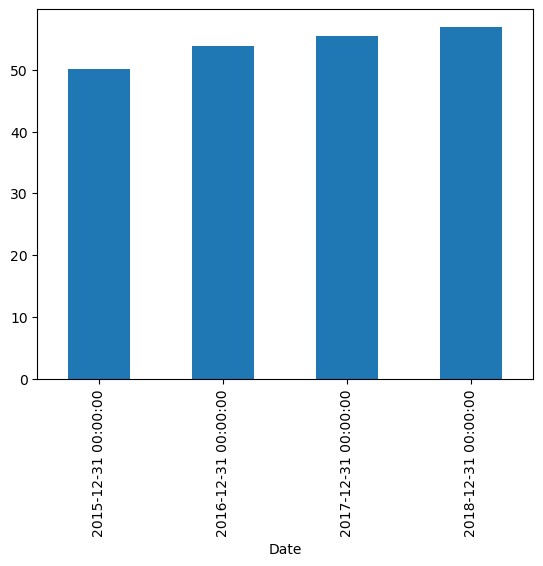

In [48]:
### Let's try to plot closing prices

### daily data ----> yearly mean
df['Close'].resample(rule = 'YE').mean().plot.bar()

<Axes: xlabel='Date'>

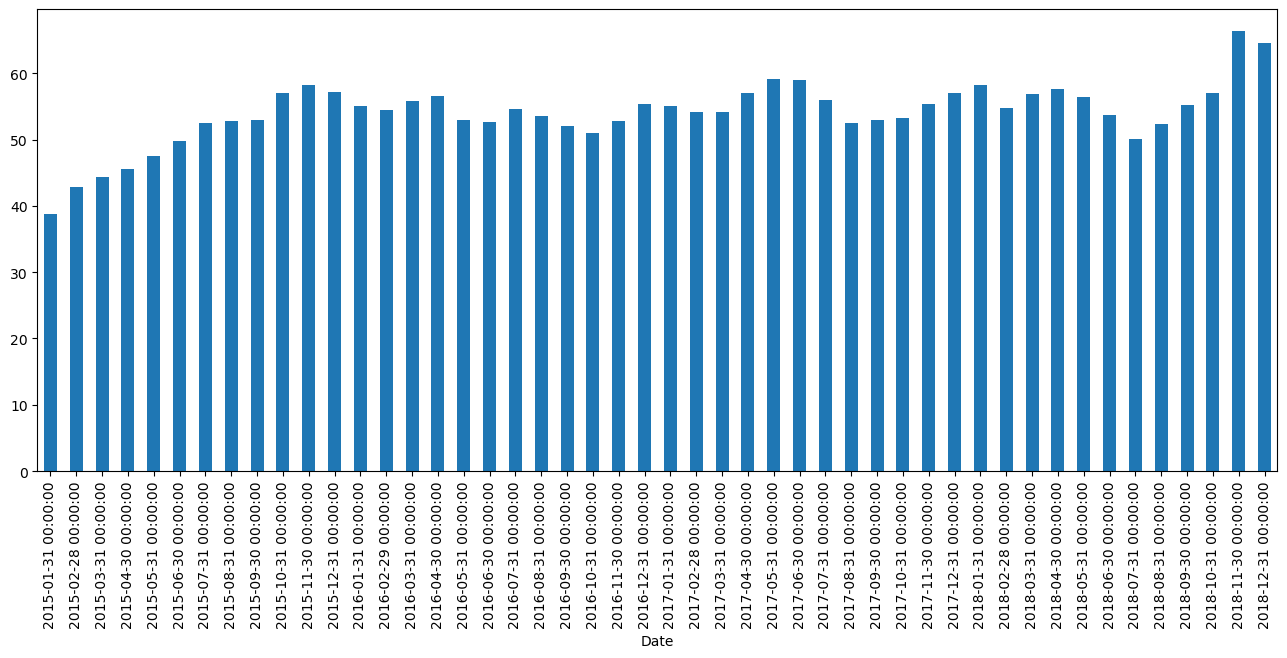

In [49]:
### daily data ----> monthly mean
df['Close'].resample(rule = 'ME').mean().plot.bar(figsize=(16,6))

#### Time Shifting

In some instances, we may have to shift all the data up/down in the time index. Pandas has built-in methods for this.

In [51]:
df = pd.read_csv('Chapter_4_starbucks.csv', index_col = 'Date', parse_dates = True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [52]:
### Note that the first day of the records is on January 02, 2015

df.tail()

### The last record is on December 31, 2018

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [53]:
### Let's imagine we want to shift the entire dataset by a given number of rows.

### Example: Shift 1 row
df.shift(1)

### Note: We have moved the first record to the second date.

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [54]:
### While doing this, we have lost one data point at the end.

df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [55]:
### We can also shift data backwards

### Example: Shift 1 row backward
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [56]:
### When we shifting data, rows with no vlaues are filled with NaNs. But we can allocate values instead of NaNs.

df.shift(periods=1, fill_value=0).head()

,Close,Volume
Date,,
2015-01-02,0.0000,0
2015-01-05,38.0061,6906098
2015-01-06,37.2781,11623796
2015-01-07,36.9748,7664340
2015-01-08,37.8848,9732554


In [57]:
### We can also shift data based on time series frequecy code. For example, we can shift all the data by one month.

df.shift(periods=1, freq='ME').head() ### We are shifting to month end (ME)

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


#### Rolling and Expanding

A common process with time series data is to calculate the rolling mean. Thus, in this section, we divide the data into windows of time and then calculate a function (mean) for each window.

In [59]:
df = pd.read_csv('Chapter_4_starbucks.csv', index_col = 'Date', parse_dates = True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<Axes: xlabel='Date'>

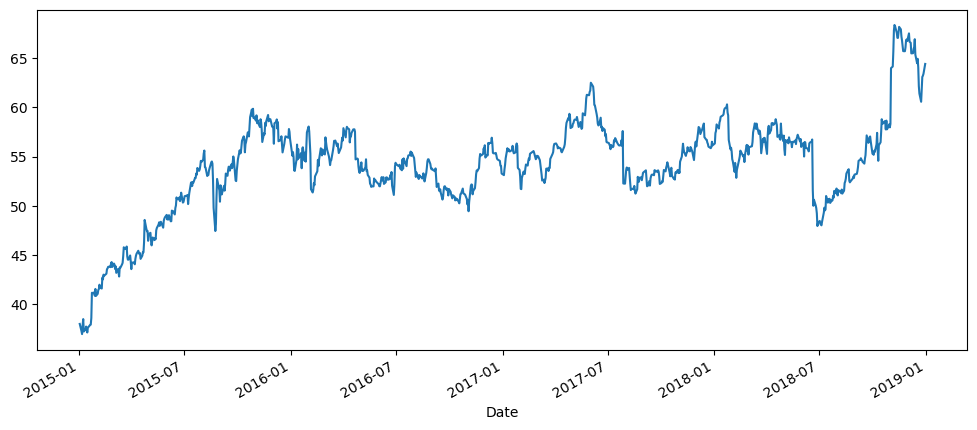

In [60]:
### Let's plot the closing price first in a line plot (line plot is the default plot)

df['Close'].plot(figsize=(12,5))

In [61]:
### Now let's plot rolling mean

### df.rolling(window=7), unit 7 is based on the rows themselves. Thus, here with daily data, it is a 7-day rolling window.

df.rolling(window=7).mean().head(10)

### Note: First 6 days are NaNs. The value on the 7th row is based on the values of the first 7 days.

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


<Axes: xlabel='Date'>

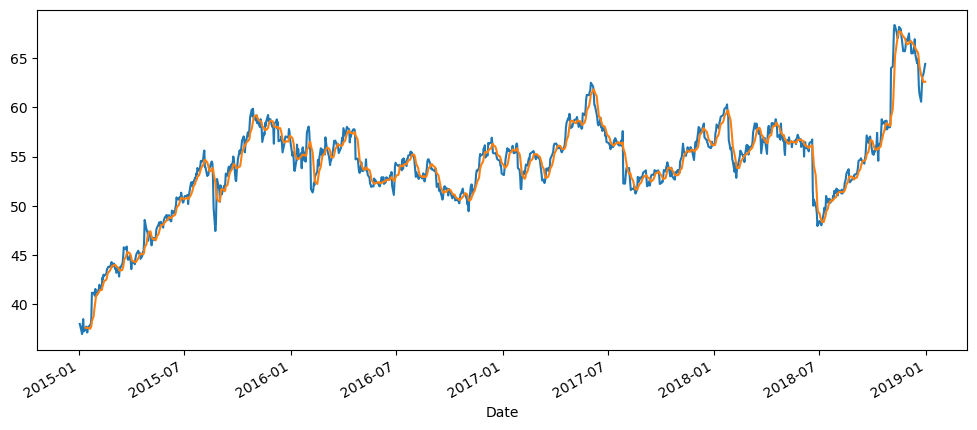

In [62]:
### Now we can plot both series and rolling mean in one plot.

df['Close'].plot(figsize=(12,5))
df.rolling(window=7).mean()['Close'].plot()

<Axes: xlabel='Date'>

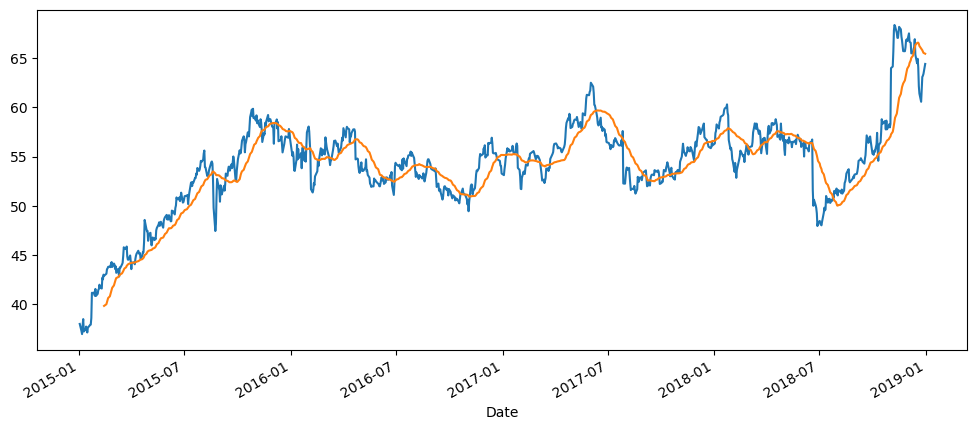

In [63]:
### 30-day rolling mean

df['Close'].plot(figsize = (12,5))
df.rolling(window = 30).mean()['Close'].plot()

In [64]:
### Alternative Approach: Add the rolling mean as a new column to the existing dataframe

df['Close: 30 Day Mean'] = df['Close'].rolling(window = 30).mean()
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


<Axes: xlabel='Date'>

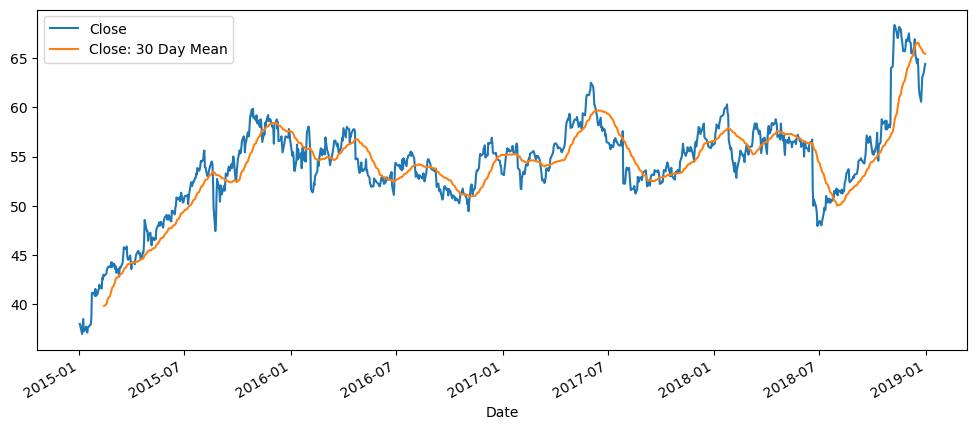

In [65]:
df[['Close','Close: 30 Day Mean']].plot(figsize = (12,5))

<Axes: xlabel='Date'>

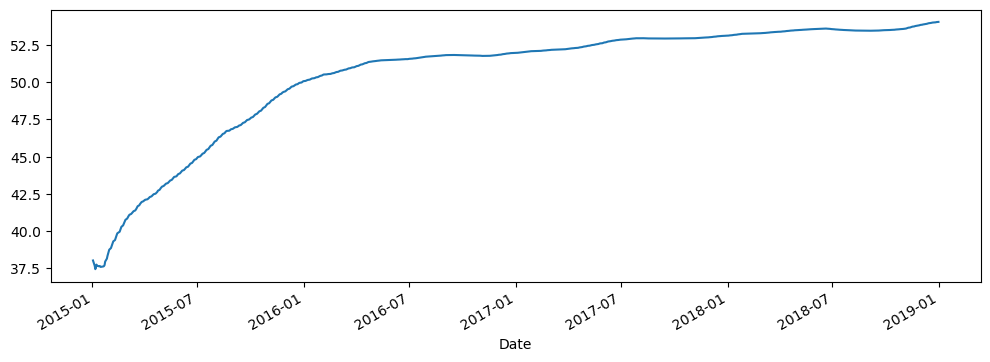

In [66]:
### Let's assume we want to calculate a function (mean) based on values up to a point in time.
### This is known as 'expanding'
### Each value on the graph is based on the values up to that point. That is, the last value is the average of the column 'Close'.

df['Close'].expanding().mean().plot(figsize=(12,4))

#### Visualizing Time Series Data (Part I)

In this subsection, we are investigating plotting time series data, adding titles, axis labels, x-axis limits, and x ticks.

In [68]:
df = pd.read_csv('Chapter_4_starbucks.csv', index_col = 'Date', parse_dates = True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [69]:
df.index

### Note: Index must be a datetime index (for time series plotting specifically)
### if it is not, convert it to a datetime index by using the function 'to_datetime()'

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

<Axes: xlabel='Date'>

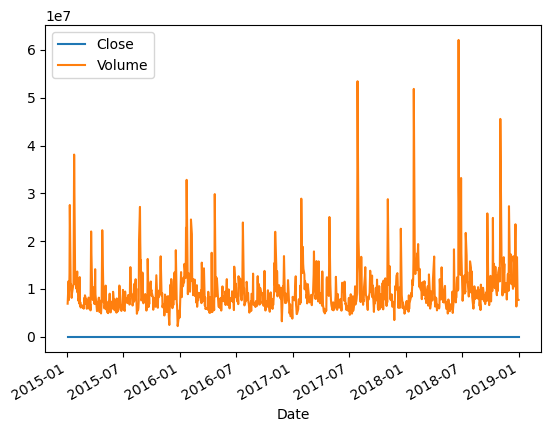

In [70]:
df.plot()

### Note: Columns are in different scales.

<Axes: xlabel='Date'>

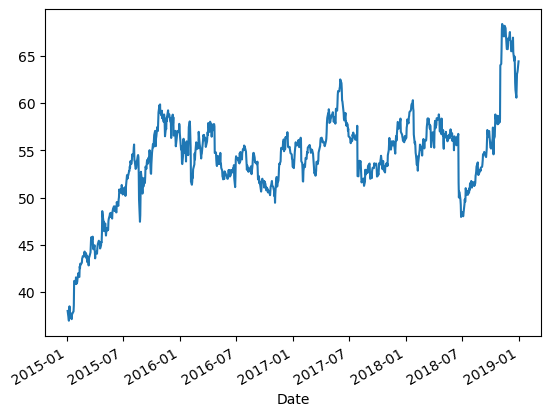

In [71]:
df['Close'].plot()

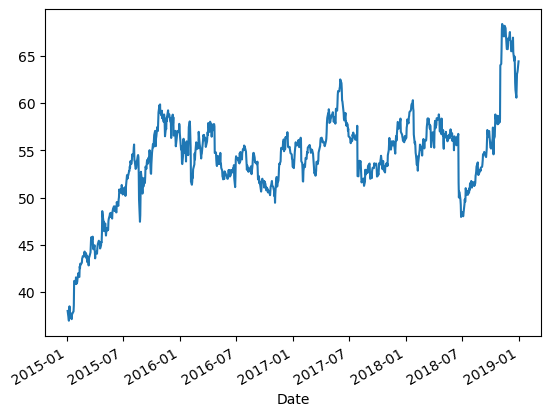

In [72]:
### Note: above the plot we see '<Axes: xlabel='Date'>', we can add a ';' at the end of the command.

df['Close'].plot();

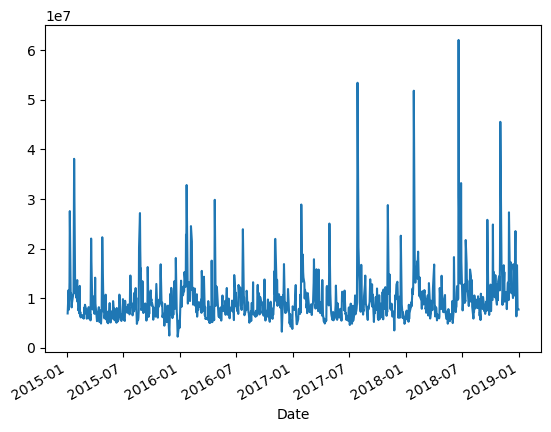

In [73]:
df['Volume'].plot();

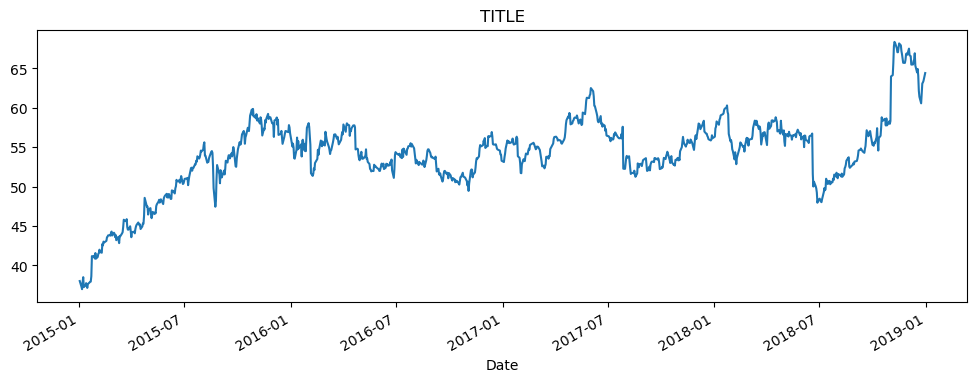

In [74]:
title = 'TITLE'
ylabel = 'Y LABEL'
xlabel = 'X LABEL'

### Add a title
df['Close'].plot(figsize=(12,4), title=title);

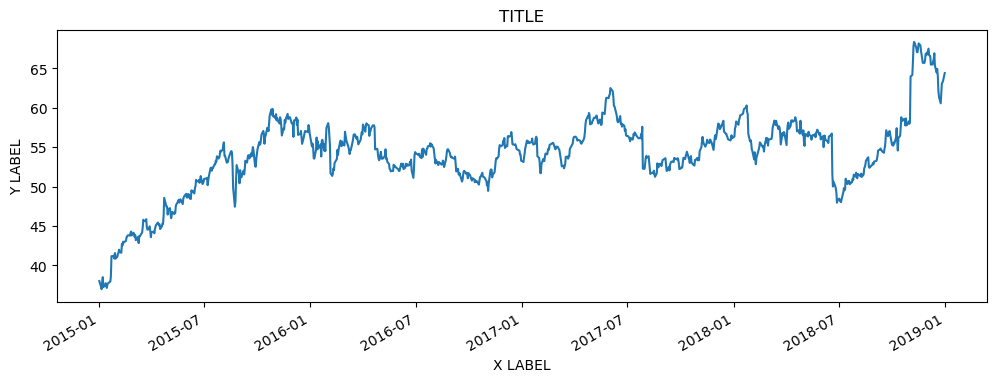

In [75]:
### Add a x-axis and y-axis labels

ax = df['Close'].plot(figsize=(12,4), title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

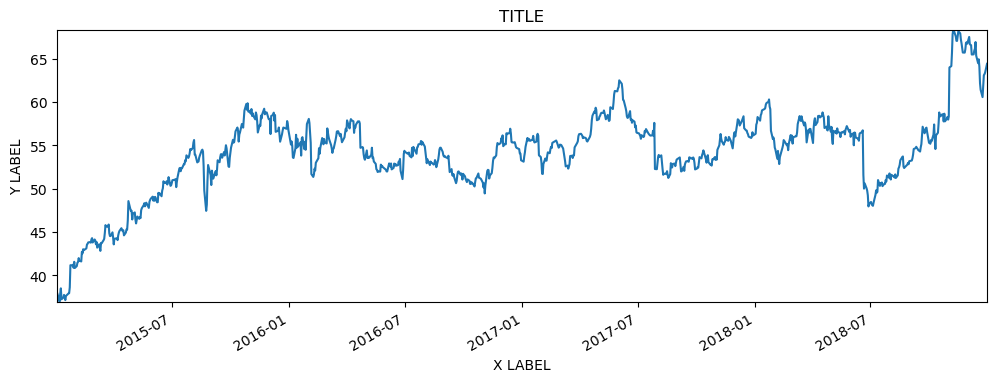

In [76]:
### We can also autoscale the axises

ax = df['Close'].plot(figsize=(12,4), title=title)
ax.autoscale(axis='both', tight=True) ### No white space before starting point, after ending point, above highest value, under lowest value
ax.set(xlabel=xlabel, ylabel=ylabel);

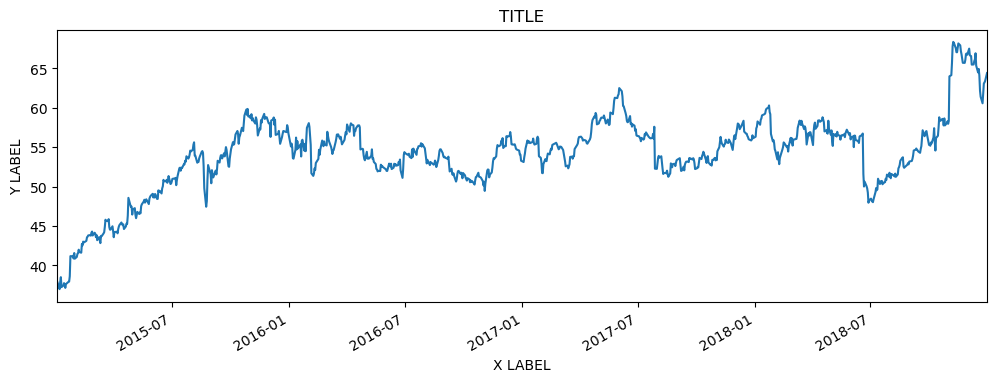

In [77]:
ax = df['Close'].plot(figsize=(12,4), title=title)
ax.autoscale(axis='x', tight=True) ### No white space before starting point and after ending point
ax.set(xlabel=xlabel, ylabel=ylabel);

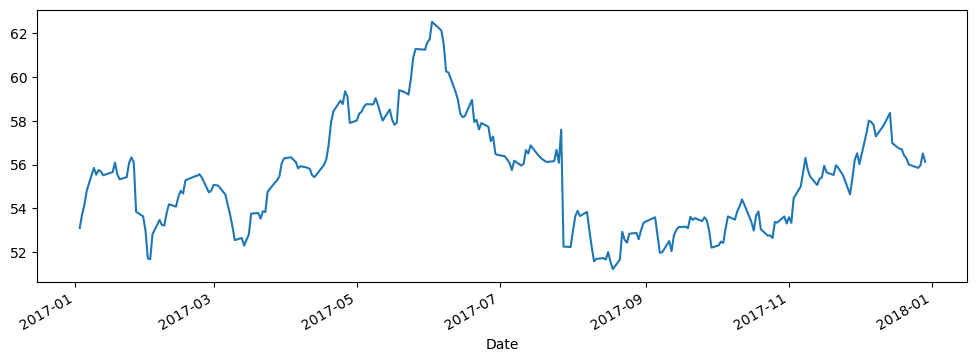

In [78]:
### We can also set a specific span of time on the x-axis
### Here we have two options:
    #### 1. Edit in dataframe
    #### 2. condition when plotting

### Let's assume we want to plot closing prices for the year 2017

### Option 1
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4));

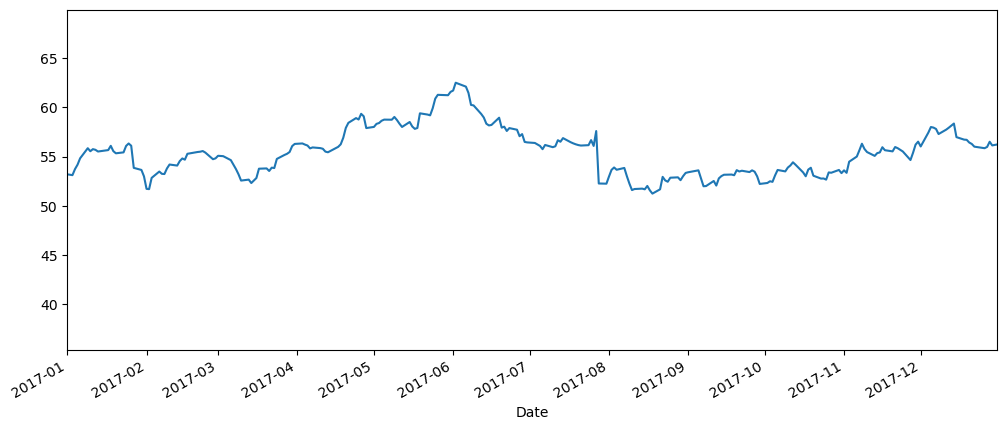

In [79]:
### Option 2
df['Close'].plot(figsize=(12,5), xlim=['2017-01-01','2017-12-31']); ### Note: Instead of ':', here we use ','

### The plot is slightly different, as we use plot first, which changes the x-axis and y-axis scales.
### We can fix this using 'autoscale'

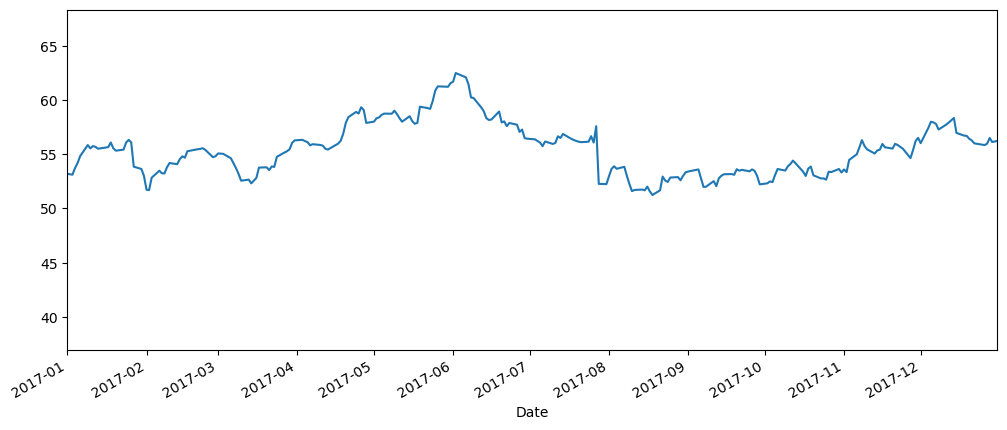

In [80]:
ax = df['Close'].plot(figsize=(12,5), xlim=['2017-01-01','2017-12-31'])
ax.autoscale(axis='y', tight=True)

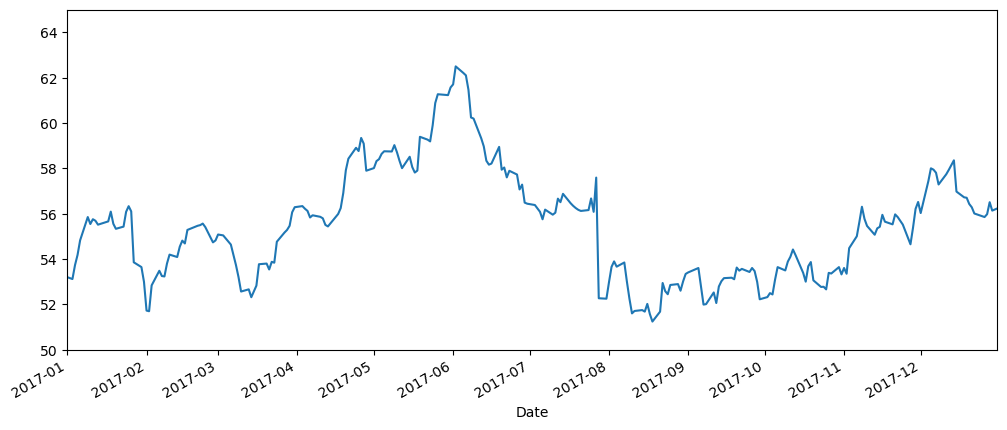

In [81]:
### Similar 'xlim' to we can set 'ylim'

df['Close'].plot(figsize=(12,5), xlim=['2017-01-01','2017-12-31'], ylim=[50,65]);

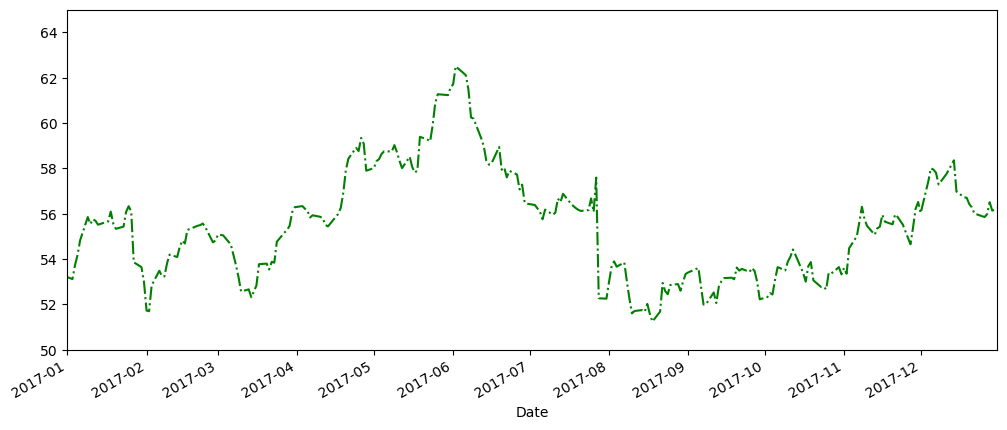

In [82]:
### We can also try more modifications

df['Close'].plot(figsize=(12,5), xlim=['2017-01-01','2017-12-31'], ylim=[50,65], ls='-.', c='green');

#### Visualizing Time Series Data (Part II)

In this subsection, we investigate midifcations for a datetime object, specifically: setting x Ticks, spacing, and date formatting

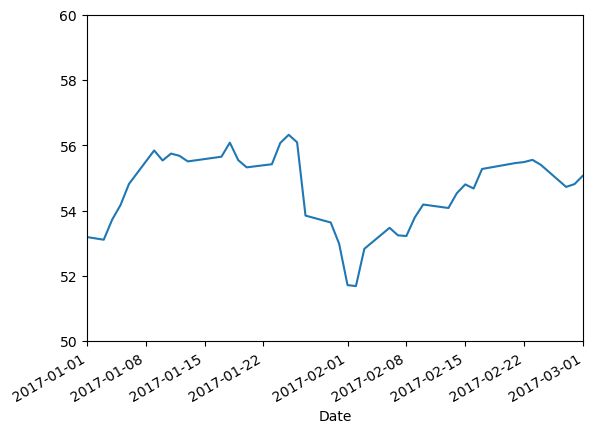

In [84]:
###  x Ticks

from matplotlib import dates

df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60]);

### Note: x ticks a little bit weird. This is because they start every month and show the date after 7 days.
### We may also want to delete the 'Date' label on the x-axis.

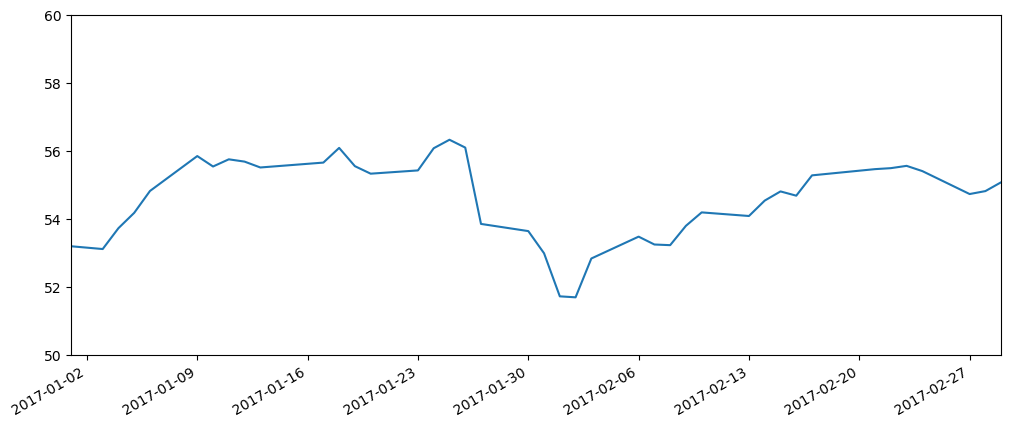

In [85]:
ax = df['Close'].plot(figsize=(12,5),xlim=['2017-01-01','2017-03-01'], ylim=[50,60]);
ax.set(xlabel='') ### Remove x-axis label
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

### Note: NO unequal spacing in x-axis ticks

### For a full list of locator options available at: https://matplotlib.org/stable/api/dates_api.html#date-tickers

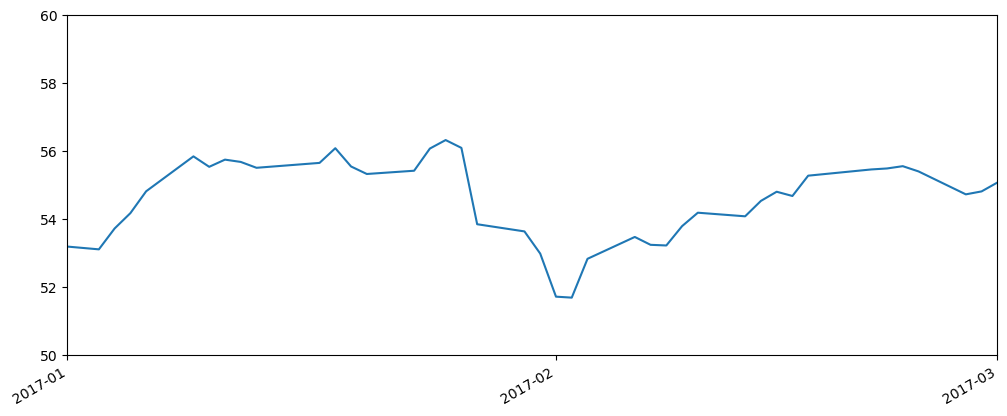

In [86]:
### Example: A tick at the beginning of each month

ax = df['Close'].plot(figsize=(12,5),xlim=['2017-01-01','2017-03-01'], ylim=[50,60]);
ax.set(xlabel='') ### Remove x-axis label
ax.xaxis.set_major_locator(dates.MonthLocator(bymonthday=1))

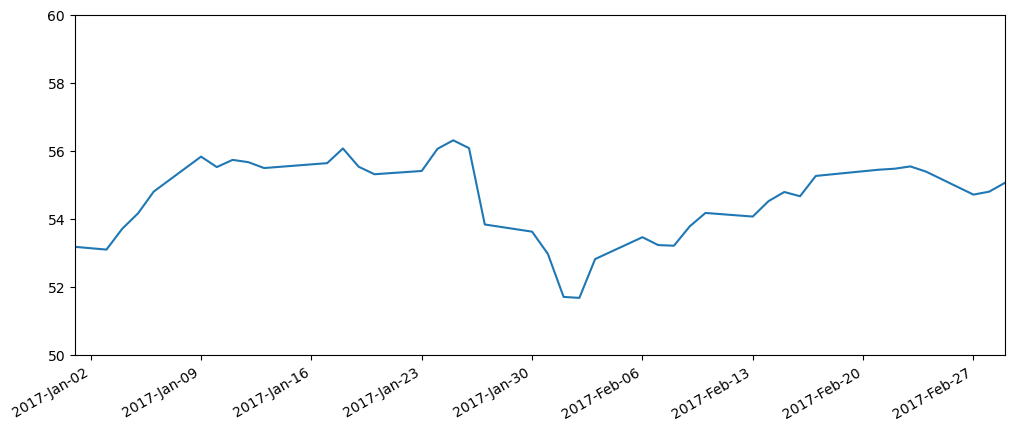

In [87]:
### Now let's check the formatting of the ticks.
### Currently, it is showing YYYY-MM-DD. We may want to see the name of the month (e.g., Jan)

### Formatting follows the Python datetime codes.
### Link: https://strftime.org/

ax = df['Close'].plot(figsize=(12,5),xlim=['2017-01-01','2017-03-01'], ylim=[50,60]);
ax.set(xlabel='') ### Remove x-axis label
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%b-%d'))

### Note: Here we are setting the major axes. We can also set up minor axes.

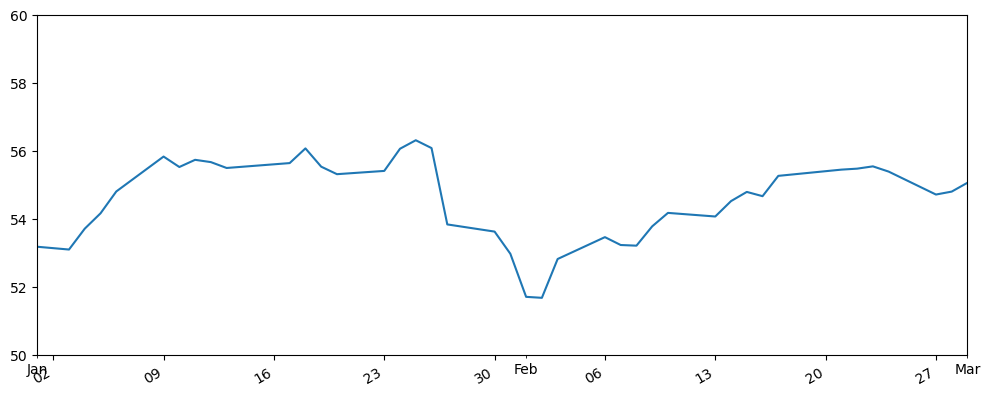

In [88]:
ax = df['Close'].plot(figsize=(12,5),xlim=['2017-01-01','2017-03-01'], ylim=[50,60]);
ax.set(xlabel='') ### Remove x-axis label
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

### Note, there are two levels now. It shows the month and also the day.

### However, there is an issue as two values are overlapping. We can fix this by adding new 'lines' to the 'DatesFormatter'

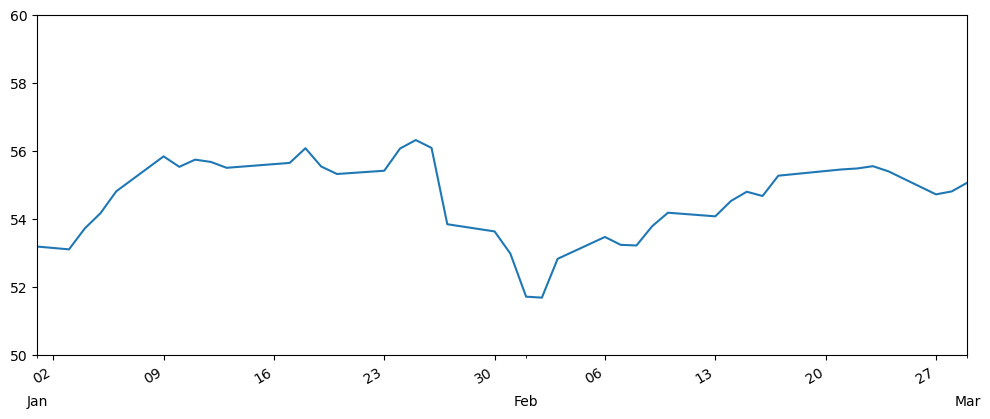

In [89]:
ax = df['Close'].plot(figsize=(12,5),xlim=['2017-01-01','2017-03-01'], ylim=[50,60]);
ax.set(xlabel='') ### Remove x-axis label
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b')) ### Adding two new lines with '\n\n'

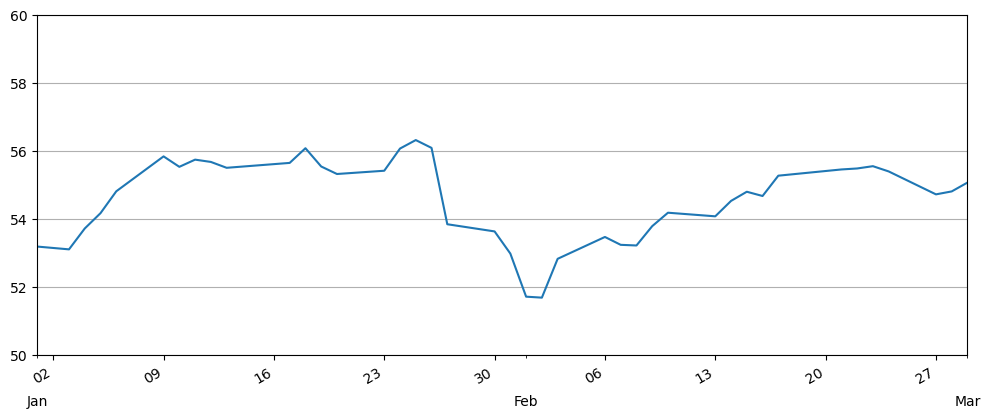

In [90]:
### We can also add grid lines to make reading the values easy.

ax = df['Close'].plot(figsize=(12,5),xlim=['2017-01-01','2017-03-01'], ylim=[50,60]);
ax.set(xlabel='') ### Remove x-axis label
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)

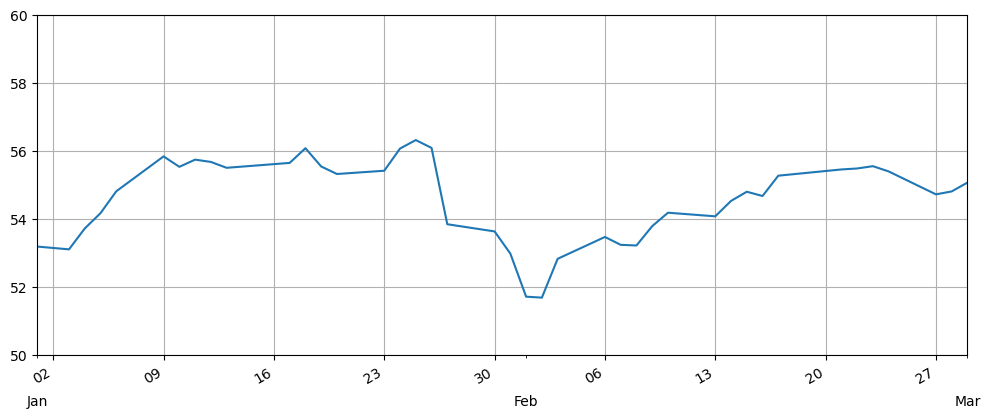

In [91]:
ax = df['Close'].plot(figsize=(12,5),xlim=['2017-01-01','2017-03-01'], ylim=[50,60]);
ax.set(xlabel='') ### Remove x-axis label
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)